# Intro to PyTorch

### PyTorch is the premiere package for object-based machine-learning. It is currently used as the backend training for AI state-of-the-art technologies. E.g: Tesla's autopilot for self-driving cars and Stable Diffusion.
### It is derived from the Lua-based torch library. We will expand on the use of PyTorch for constructing neural network models for simple applications.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## The Tensor Class

### The default Torch array data structure is the Torch tensor. This class is almost completely analogous to its NumPy counterpart (the NumPy array), and bears a lot of the same methods:

In [2]:
t = torch.arange(1,10)
n = np.arange(1,10)
print(t)
print(n)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
[1 2 3 4 5 6 7 8 9]


In [3]:
t_33 = t.reshape(3,3)
n_33 = n.reshape(3,3)
print(t_33)
print(n_33)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Array operations work similarly:

In [4]:
t_22 = torch.linspace(0,1,4).reshape(2,2)
print(np.shape(t_22))

op = t_22+(t_22**2)
print(torch.Tensor.size(op))

torch.Size([2, 2])
torch.Size([2, 2])


### I.e: shape of array **must** match. This means each dimension must be equal, or any n-dimension may be matched with a dimension of size 1. E.g:

In [5]:
# t_232 = torch.linspace(0,1,12).reshape(2,3,2)
# t_222 = torch.linspace(0,1,8).reshape(2,2,2)

# print(np.shape(t_232+t_222))

In [6]:
t_211 = torch.linspace(0,1,2).reshape(2,1,1)
t_222 = torch.linspace(0,1,8).reshape(2,2,2)

print(np.shape(t_211+t_222))

torch.Size([2, 2, 2])


In [7]:
l = t_22[:,:,None,None]*t_22[None,None,:,:]

print(np.shape(t_22[:,:,None,None]))
print(np.shape(t_22[None,None,:,:]))
print(np.shape(l))

torch.Size([2, 2, 1, 1])
torch.Size([1, 1, 2, 2])
torch.Size([2, 2, 2, 2])


### Torch tensors start to differ from NumPy on their seamless integration with automatic differentiation. The keyword *requires_grad* decides whether we record gradient operations on the declared tensor.

### $$y =\sum_i x_i^2$$

### $$\Rightarrow \frac{\partial y}{\partial x_i} = 2x_i$$

In [8]:
x = torch.tensor([1.,2., 3.], requires_grad = True)
y = (x**2).sum()

In [9]:
y.backward() #Perform gradient operation
x.grad #x after gradient. This prints every operation applied on x when declared on y.

tensor([2., 4., 6.])

In [10]:
2*x

tensor([2., 4., 6.], grad_fn=<MulBackward0>)

### Automatically computing gradients is convenient for ML models, including those trained through gradient descent. In this case, automatic differentiation will be used in the context of $y = f(x)$ being our "error" or loss function.

### Finally, the tensor object poses some benefits in time complexity for (some) operations on large arrays:

In [11]:
import time
N = 1000
X = torch.randn((N,N))
Y = torch.randn((N,N))

t0 = time.perf_counter()
torch.matmul(X,Y)
t1 = time.perf_counter()

print("Time is {}s".format(t1-t0))

Time is 0.007895200000000102s


In [12]:
import time
X1 = X.detach().numpy() #Converts to numpy array.
Y1 = Y.detach().numpy()

t0 = time.perf_counter()
X1@Y1
t1 = time.perf_counter()

print("Time is {}s".format(t1-t0))

Time is 0.008720399999999628s


### Without loss of generality, the goal of a neural network is to construct a model that predicts the behavior of a function $f$ that connects input x data, and output y data. For example, we want a general model to predict temperatures ($y$) based on the hour (t), the humidity (h), and the month (m). Thus, we let $\hat{y}$ = f(t,h,m; $\alpha$). In this case, $\hat{y}$ is our predicted temperature for the parameters, while $y$ is the actual temperature. $\alpha$ represents parameters we can tune through gradient descent.

### Thus, we define a *Loss* function L($y$,$\hat{y}$), which is analogous to our error. E.g: L($y$,$\hat{y}$) = $\sum_i (y_i-\hat{y}_i)^2$ (mean square error). Minimizing this function by changing the $\alpha$ parameters minimizes the "error," and so, leads to a more accurate interpolation function $f$ (atleast for the inputs provided).

In [13]:
x = torch.tensor([[1., 2.],[2.,5.], [3.,7.], [0., 1.]]) 
y = torch.tensor([r[0]+r[1] for r in x]) 
print(y)
print(np.shape(x))
print(np.shape(y))

tensor([ 3.,  7., 10.,  1.])
torch.Size([4, 2])
torch.Size([4])


### We define two linear transformations $M_1, M_2$ that corresponds to the $\alpha$ parameters mentioned prior (more on this later). We know our input is a 4x2 matrix, and we want a vector that is 4x1 as output. So if we multiply x by a 2xN, and then by a Nx1 matrix, our output will be a 4x1 matrix. The nn.linear function creates a function that maps an array to that array times a linear matrix multiplication (with a bias vector b). I.e: $g(x) = Ax+b$.

In [14]:
M1 = nn.Linear(2, 10, bias = False)
M2 = nn.Linear(10, 1, bias = False)

print(M1(x))
print(np.shape(M1(x)))
print(M2(M1(x)).squeeze()) #.squeeze makes a 4x1 array a simple 4 array.

tensor([[ 0.5772,  0.3789,  0.4734, -0.0873,  0.0076, -0.7045, -1.2205, -0.7178,
         -1.1477, -0.5126],
        [ 1.5640,  0.8878,  1.0077, -0.0724,  0.0917, -1.8147, -3.0349, -2.0473,
         -2.7755, -1.5694],
        [ 2.1413,  1.2667,  1.4812, -0.1597,  0.0993, -2.5191, -4.2554, -2.7651,
         -3.9232, -2.0820],
        [ 0.4096,  0.1301,  0.0609,  0.1022,  0.0765, -0.4057, -0.5938, -0.6117,
         -0.4801, -0.5442]], grad_fn=<MmBackward0>)
torch.Size([4, 10])
tensor([0.3967, 1.2180, 1.6146, 0.4246], grad_fn=<SqueezeBackward0>)


In [15]:
print(M2(M1(x)).squeeze())
print(y) #Not even close...

tensor([0.3967, 1.2180, 1.6146, 0.4246], grad_fn=<SqueezeBackward0>)
tensor([ 3.,  7., 10.,  1.])


### Create a class representing the aforementioned neural network.

In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(2,8,bias=False)
        self.M2 = nn.Linear(8,1,bias=False)
    def forward(self,x):
        return self.M2(self.M1(x) ).squeeze()

In [17]:
f = Net()
f(x)

tensor([-0.3112, -0.7427, -1.0539, -0.1202], grad_fn=<SqueezeBackward0>)

### We define the loss by the aforementioned mean-square error using nn.MSELoss():

In [18]:
L = nn.MSELoss()
print(L(y,f(x)))
print(torch.mean((y-f(x))**2))

tensor(48.5896, grad_fn=<MseLossBackward0>)
tensor(48.5896, grad_fn=<MeanBackward0>)


# Gradient Descent

### Gradient descent is a relatively simple minimization problem. In this case, we minimize the error/loss by finding the $\alpha$ parameters that lead to the error closest to 0. In 1-dimension (for $\alpha$), this is done by finding $\alpha$ such that $\partial f/\partial \alpha = 0$. In this case, we adjust each of our parameters $\alpha_i$ iteratively: 

### $$\alpha_i \rightarrow \alpha_i-l\frac{\partial L}{\partial a_i} ,$$
### for n iterations (epochs) until we find a minimum in our loss function. Here, $l$ is the learning rate of your algorithm. The stochastic gradient descent inherent to PyTorch performs this process using automatic differentiation. 

In [19]:
from torch.optim import SGD

opt = SGD(f.parameters(), lr=0.001) #Stochastic gradient descent operation.
print(y)
print(f(x))

tensor([ 3.,  7., 10.,  1.])
tensor([-0.3112, -0.7427, -1.0539, -0.1202], grad_fn=<SqueezeBackward0>)


In [20]:
from tqdm import tqdm

def train(x,y,f,epoch = 50):
    loss_num = []
    L = nn.MSELoss()
    opt = SGD(f.parameters(), lr=0.001)
    for epoch in tqdm(range(epoch)):
        opt.zero_grad() # Set gradient to 0.
        loss = L(f(x), y) 
        loss.backward() # Compute loss gradient with regards to parameters.
        opt.step() # Perform iteration using gradient above.
        loss_num.append(loss.item())
    return f, loss_num

f, loss_num  = train(x,y,f,20000)

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:05<00:00, 3951.43it/s]


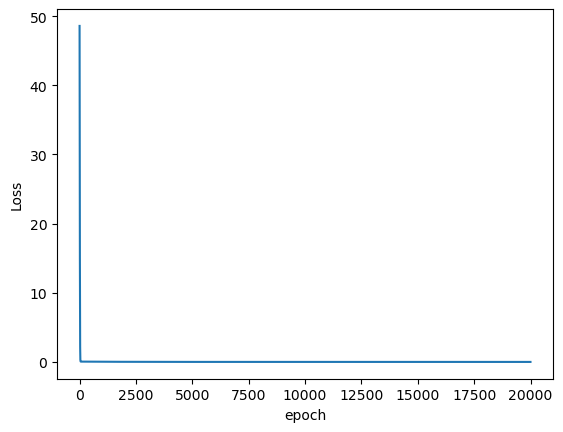

In [21]:
plt.plot(loss_num)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [22]:
print(y)
print(f(x))

tensor([ 3.,  7., 10.,  1.])
tensor([2.9996, 7.0002, 9.9998, 1.0011], grad_fn=<SqueezeBackward0>)


In [23]:
x_test = torch.randn((4,2))
y_test = torch.tensor([r[0]+r[1] for r in x_test]) 
print(y_test)
print(np.shape(x_test))
print(np.shape(y_test))

tensor([-0.9735, -0.1108, -1.9995,  0.0533])
torch.Size([4, 2])
torch.Size([4])


In [24]:
print(y_test)
print(f(x_test))

tensor([-0.9735, -0.1108, -1.9995,  0.0533])
tensor([-0.9686, -0.1121, -1.9990,  0.0555], grad_fn=<SqueezeBackward0>)


### Consider the following case:

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3827.02it/s]


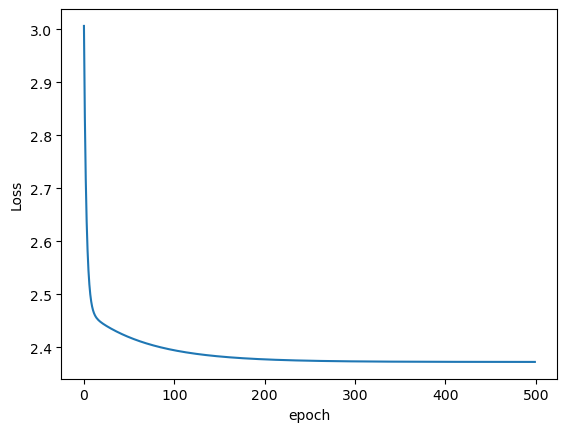

2.372720241546631


In [25]:
x1 = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y1 = torch.tensor([1,5,2,5]).float()

g = Net()

g, losses1 = train(x1,y1,g,500)

plt.plot(losses1)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

print(np.min(losses1))

In [26]:
print(y1)
print(g(x1))

tensor([1., 5., 2., 5.])
tensor([2.7858, 2.5048, 1.9307, 5.2663], grad_fn=<SqueezeBackward0>)


### For this function (which is likely not linear), layers that are linear transformations aren't great approximations. As such, we add *activation layers* to our model. These are typically nonlinearities that add independence between our parameters represented by the aforementioned matrices. Consider our previous model: $$M_2(M_1x+b_1)+b_2 = M_2M_1x \ \ (b=\hat{0}).$$

### We now add a nonlinearity N (a **slightly** nonlinear function applied element-wise) right after our first linear transformation by $M_1$. Thus, our new model is given by:  $$M_2N(M_1x).$$

## Examples of common nonlinearities:

### ReLU

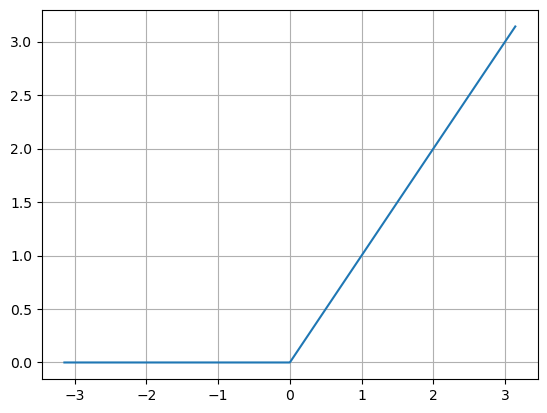

In [27]:
t = torch.linspace(-np.pi,np.pi, 1000)
act = nn.ReLU()
y = act(t)

plt.plot(t.numpy(), (y).numpy())
plt.grid()
plt.show()

### Tanh

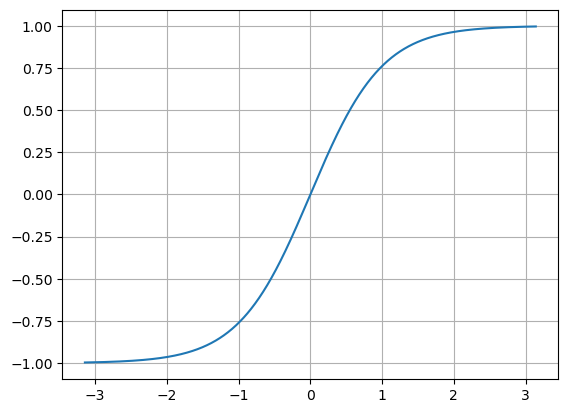

In [28]:
t = torch.linspace(-np.pi,np.pi, 1000)
act = nn.Tanh()
y = act(t)

plt.plot(t.numpy(), (y).numpy())
plt.grid()
plt.show()

### Sigmoid

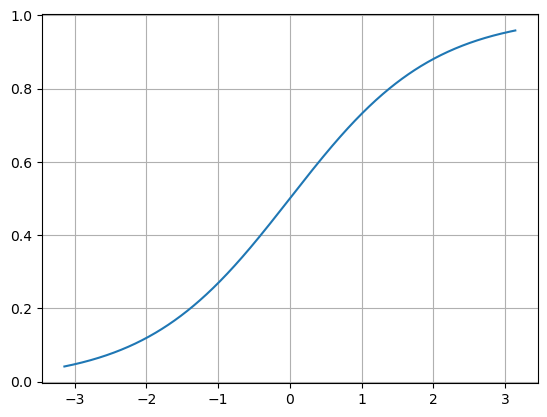

In [29]:
t = torch.linspace(-np.pi,np.pi, 1000)
act = nn.Sigmoid()
y = act(t)

plt.plot(t.numpy(), (y).numpy())
plt.grid()
plt.show()

In [30]:
class NetNL(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(2,8,bias=False)
        self.M2 = nn.Linear(8,1,bias=False)
        self.N = nn.ReLU()
    def forward(self,x):
        return self.M2( self.N(self.M1(x) ) ).squeeze()
    
x1 = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y1 = torch.tensor([1,5,2,5]).float()

fNL = NetNL()

fNL, lossNL = train(x1,y1,fNL, 5000)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3638.15it/s]


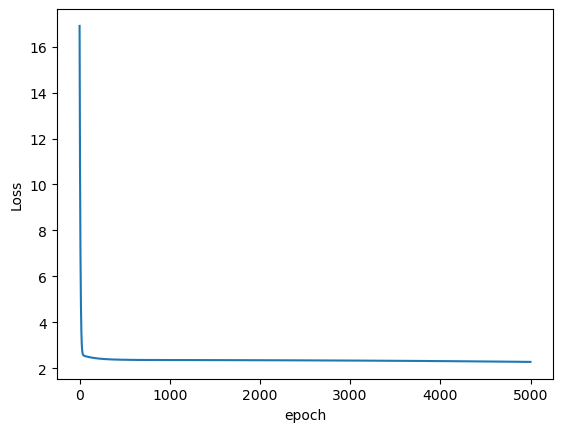

In [31]:
plt.plot(lossNL)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

### No significant difference yet... but the addition of more parameters leads to significant corrections now that we have this nonlinearity: 

In [32]:
N = 64
class NetNL(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(2,N,bias=False) #Try some different values!
        self.M2 = nn.Linear(N,1,bias=False)
        self.N = nn.ReLU()
    def forward(self,x):
        return self.M2( self.N(self.M1(x) ) ).squeeze()
    
x1 = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y1 = torch.tensor([1,5,2,5]).float()

fNL = NetNL()

fNL, lossNL = train(x1,y1,fNL, 5000)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3445.61it/s]


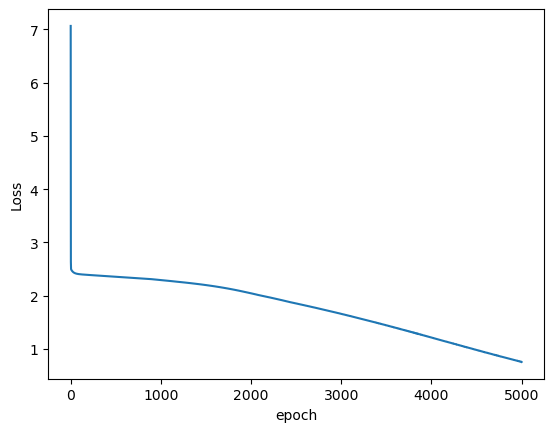

In [33]:
plt.plot(lossNL)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [34]:
print(y1)
print(fNL(x1))

tensor([1., 5., 2., 5.])
tensor([2.0051, 3.5976, 1.8954, 5.1766], grad_fn=<SqueezeBackward0>)


### Now, we can add bias vectors to our layers so that our model is given by: 

### $$M_2(M_1x+b_1)+b_2.$$
### This helps shift our results towards the positive or negative side depending on layers and inputs/outputs. 

In [35]:
class NetNLbias(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(2,N,bias=True) #Try some different values!
        self.M2 = nn.Linear(N,1,bias=True)
        self.N = nn.ReLU()
    def forward(self,x):
        return self.M2( self.N(self.M1(x) ) ).squeeze()
    
x1 = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y1 = torch.tensor([1,5,2,5]).float()

fNLbias = NetNLbias()

fNLbias, lossNLbias = train(x1,y1,fNLbias, 5000)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3221.47it/s]


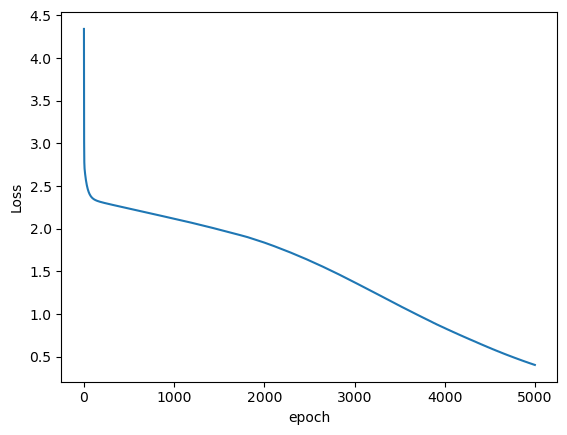

In [36]:
plt.plot(lossNLbias)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [37]:
print(y1)
print(fNLbias(x1))

tensor([1., 5., 2., 5.])
tensor([1.7971, 4.0128, 2.0509, 5.0280], grad_fn=<SqueezeBackward0>)


### Finally, we add another layer to our sequential neural network:

In [38]:
class NetNLbiasF(nn.Module):
    def __init__(self):
        super().__init__()
        self.M1 = nn.Linear(2,N,bias=True) #Try some different values!
        self.M2 = nn.Linear(N,N,bias=True)
        self.M3 = nn.Linear(N,1,bias=True)
        self.N = nn.ReLU()
    def forward(self,x):
        return self.M3( self.N( self.M2( self.N(self.M1(x) ) ) )).squeeze()
    
x1 = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y1 = torch.tensor([1,5,2,5]).float()

fNLbiasF = NetNLbiasF()

fNLbiasF, lossNLbiasF = train(x1,y1,fNLbiasF, 5000)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2365.92it/s]


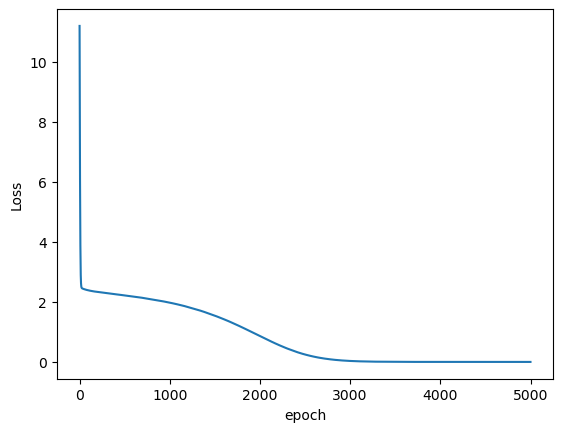

In [39]:
plt.plot(lossNLbiasF)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [40]:
print(y1)
print(fNLbiasF(x1))

tensor([1., 5., 2., 5.])
tensor([1.0012, 4.9985, 2.0001, 5.0000], grad_fn=<SqueezeBackward0>)


### Predicting our output almost exactly!

# Project: Integer Image Classification

Reference: https://www.youtube.com/watch?v=gBw0u_5u0qU

### Description of the problem: We want to take an N x N image of a number from 0 to 9. This image might be hand-drawn, or computer-generated, but the training data should represent either or both of these samples. Our output should be a prediction of the number depicted based on the input image (either a scalar output, or the probabilities of each number being depicted in the given image). 

In [41]:
x0, y0 = torch.load("training.pt") #Given data in the repo. x and y are the x and y components of the input number images. 
print(x.shape)
print(y.shape)

torch.Size([4, 2])
torch.Size([1000])


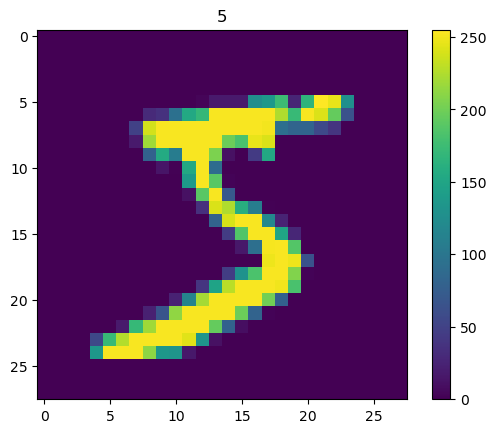

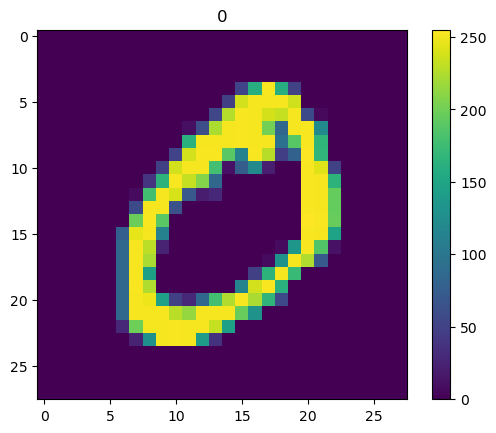

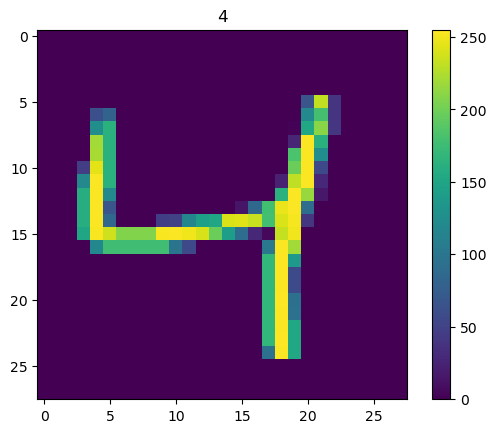

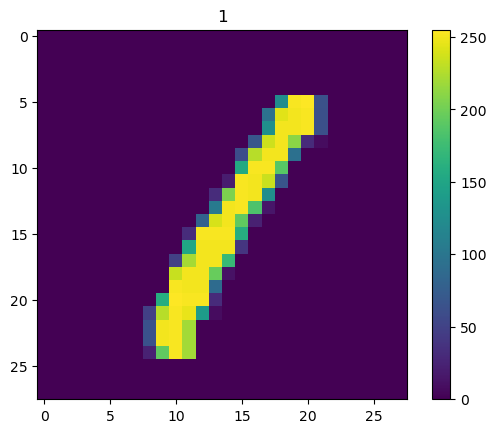

In [42]:
for i in range(4):
    plt.imshow(x0[i].numpy())
    plt.title(str(y0[i].numpy()))
    plt.colorbar()
    plt.show()

### We use the one hot encoder to construct an array of values analogous to the probability of each class. In this case, our classes are 0-9 (10 classes total). Given an input image, we know the exact number related to that image. Thus, we set the probability of that given image being that particular number as 1. E.g:

In [43]:
import torch.nn.functional as F

test = torch.arange(3) #Try another array jic!

print(test)

test_y = F.one_hot(test, num_classes = 10)

print(test_y)

tensor([0, 1, 2])
tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])


In [44]:
y_train = F.one_hot(y0, num_classes = 10).float()
print(y_train.shape)

torch.Size([60000, 10])


### PyTorch does NOT like working with 3-D arrays. As such, we flatten the images for our x, so that instead of having an 50000 x 28 x28 array, we have a 50000 x $28^2$ array.

In [45]:
x_train = x0.float()
print(x_train.shape)

print(x_train.view(-1,28**2).shape)

torch.Size([60000, 28, 28])
torch.Size([60000, 784])


### We define our neural net and our loss function. In particular, our loss is now the cross-entropy loss. This loss function is better suited to classification problems.

In [46]:
def trainC(x,y,f,epoch = 50):
    loss_num = []
    L = nn.CrossEntropyLoss()
    opt = SGD(f.parameters(), lr=0.001)
    for epoch in tqdm(range(epoch)):
        opt.zero_grad() # Set gradient to 0.
        loss = L(f(x), y) 
        loss.backward() # Compute loss gradient with regards to parameters.
        opt.step() # Perform iteration using gradient above.
        loss_num.append(loss.item())
    return f, loss_num

class NetC(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,25)
        self.Matrix2 = nn.Linear(25,25)
        self.Matrix3 = nn.Linear(25,10)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [47]:
fC = NetC()

fC, lossC = trainC(x_train[:59000],y_train[:59000],fC, 100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.74it/s]


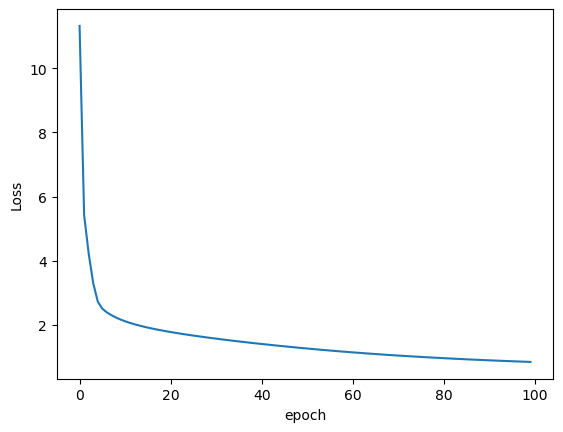

0.8421756029129028


In [48]:
plt.plot(lossC)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()
print(min(lossC))

In [49]:
print(y_train[:10])
print(fC(x_train)[:10])

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])
tensor([[ 1.9921, -9.8007, -1.7574,  3.1801, -3.8413,  2.4848, -6.5272,  1.1609,
         -1.1688, -2.8605],
        [ 9.5729, -7.5743, -4.2254,  4.7238, -2.4768, -2.0389, -9.4953, -2.9005,
         -2.6444, -6.6300],
        [ 0.8863, -2.4762,  0.3952, -2.1220,  3.1141, -2.0038,  0.1606, -2.2237,
         -3.9226,  2.7425],
        [-0.8893,  4.7269, -0.7682, -5.8136, -7.2523, -2.7565, -1.1218, -4.1953,
          0.0722, -4.1037],
        [ 1.1869, -1.7136, -1.0188, -1.2901,  2.4907, -0.4160, 

In [50]:
print(torch.argmax(y_train[0])) #Output is actual number

tensor(5)


Text(0.5, 1.0, '5')

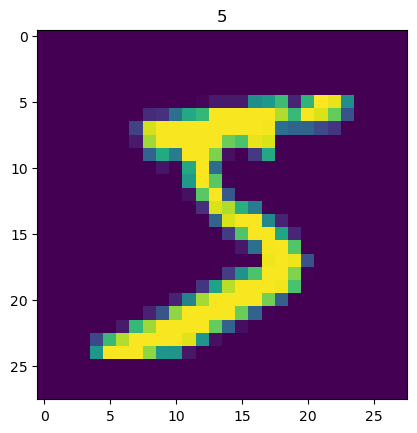

In [51]:
plt.imshow(x_train[0])
plt.title(torch.argmax(y_train[0]).numpy())

### Let's see the algorithm's predictions on training data...

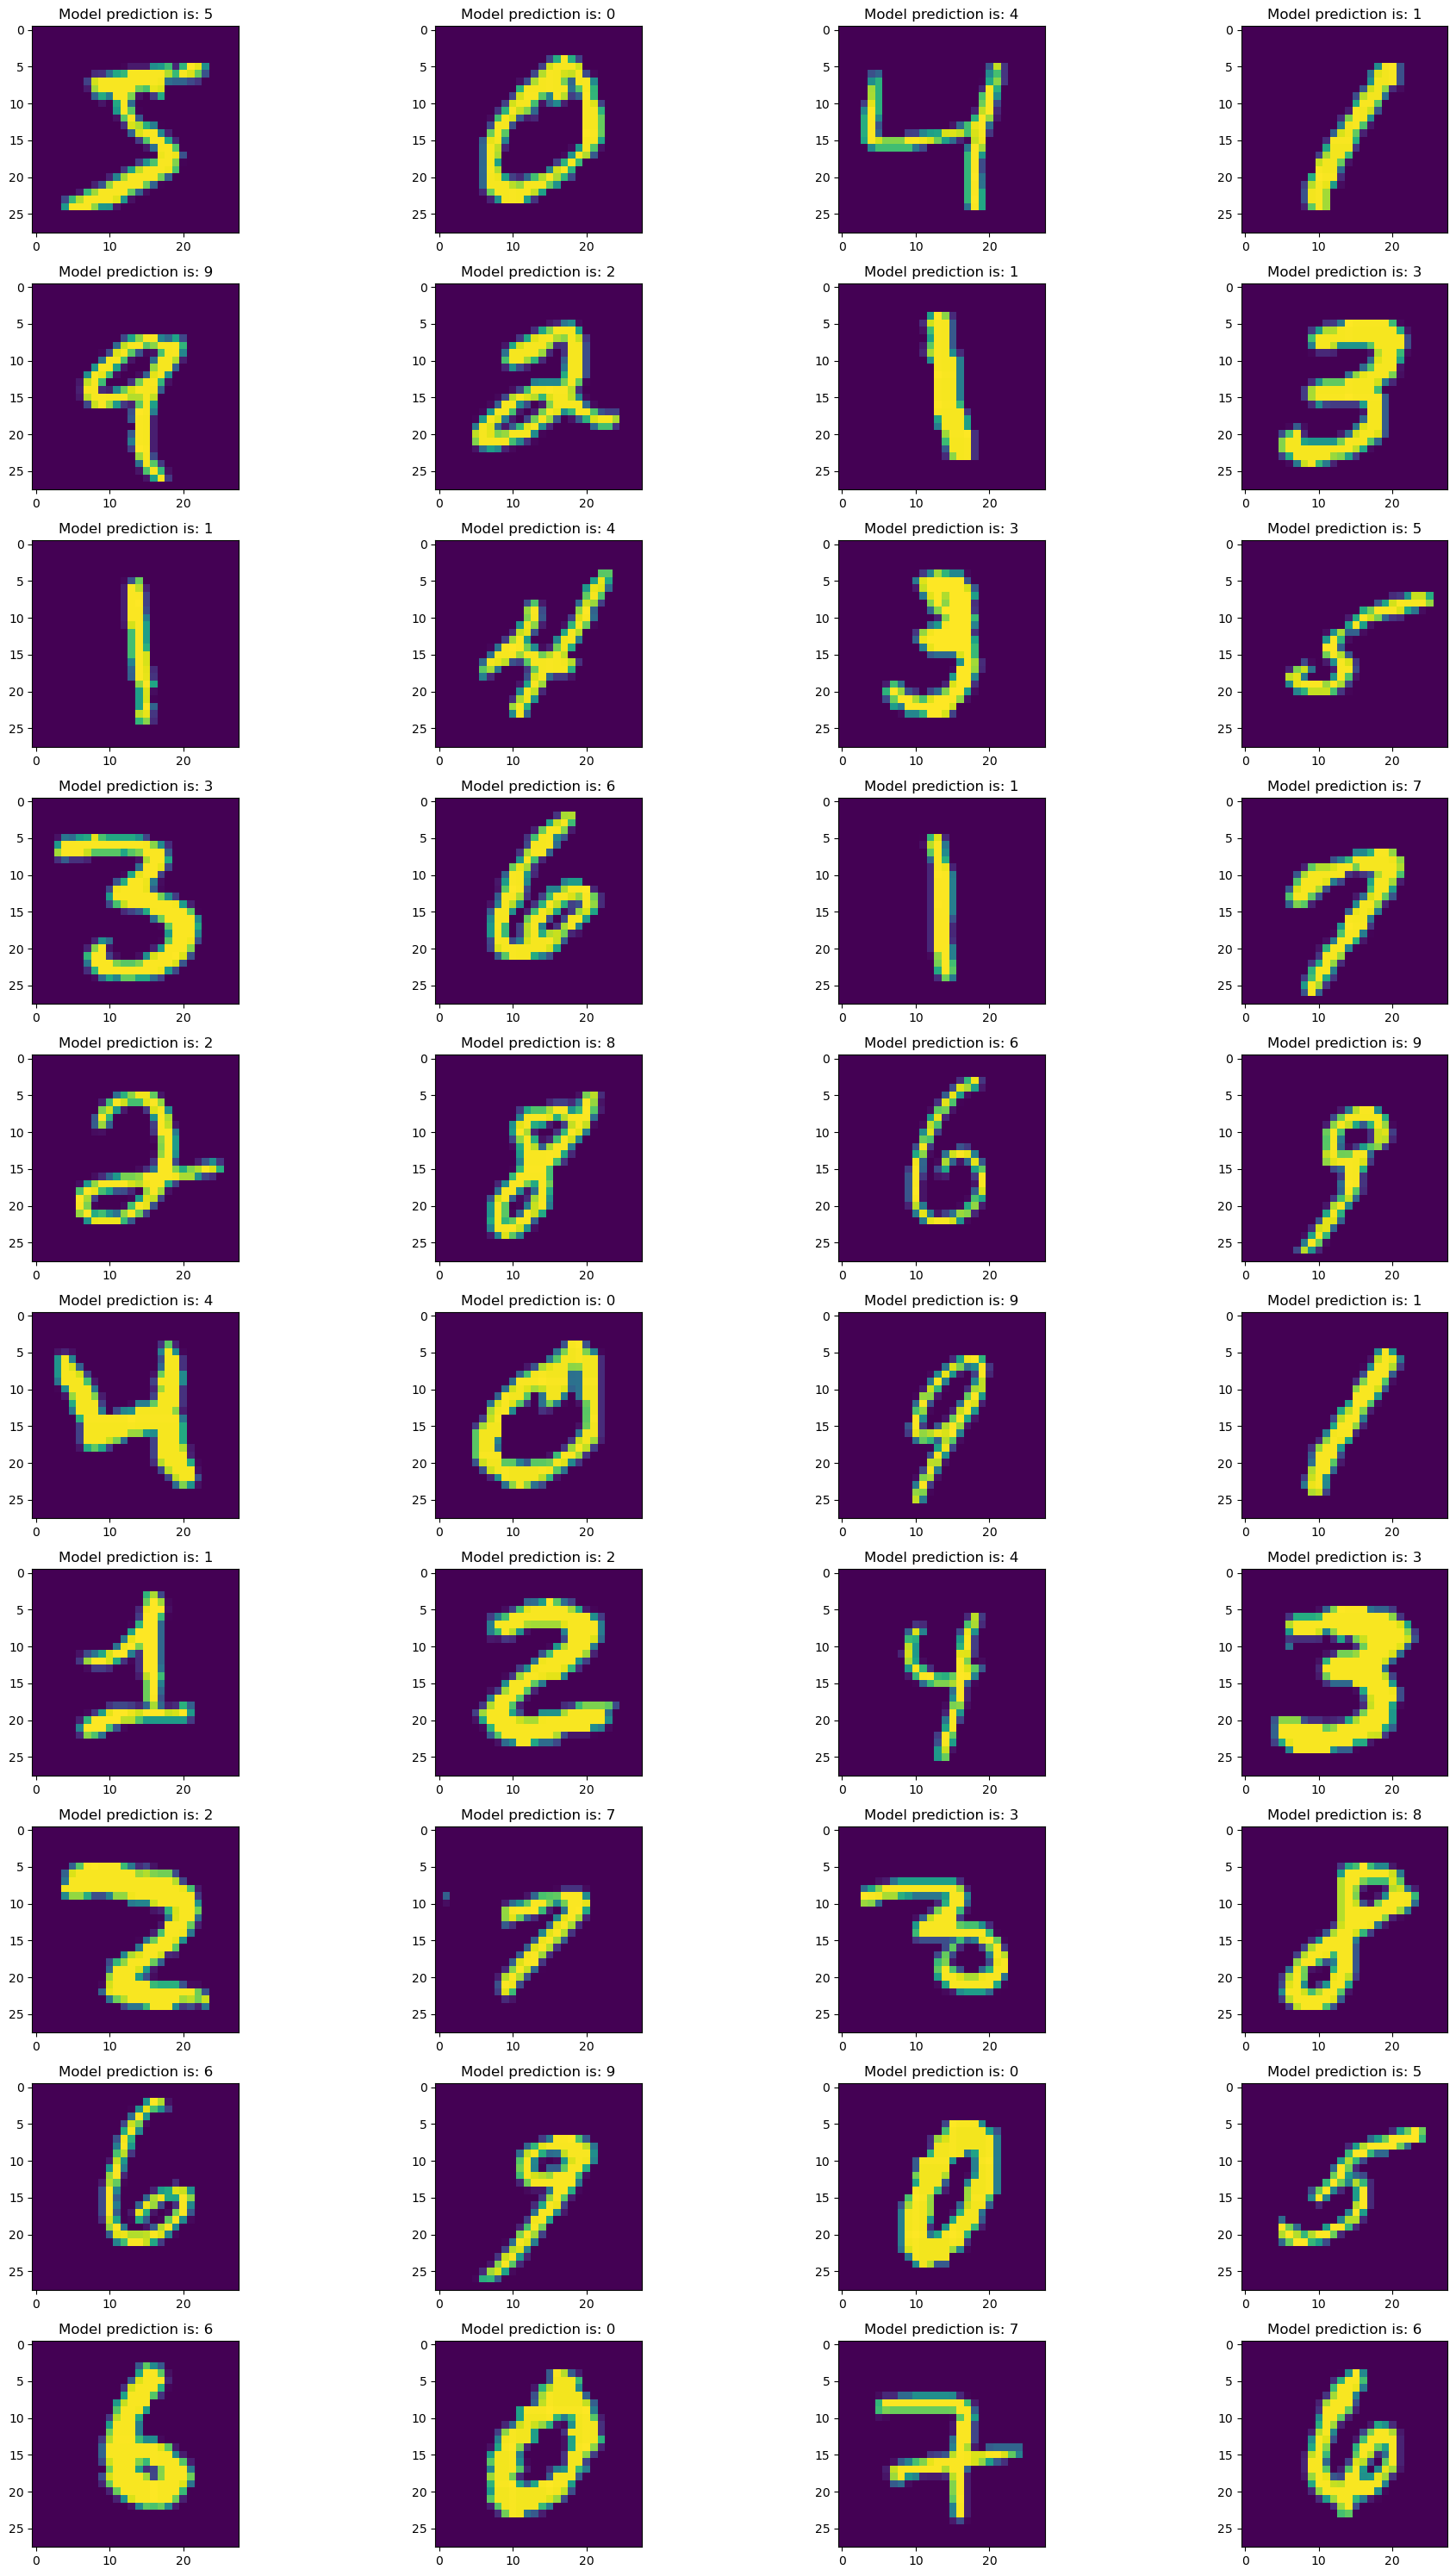

In [52]:
fig, ax = plt.subplots(10,4,figsize=(20,30)) 
for i in range(1,41):
    plt.subplot(10,4,i)
    plt.imshow(x_train[i-1])
    plt.title("Model prediction is: {}".format(torch.argmax(y_train[i-1]).numpy()))
fig.tight_layout()
plt.show()

### Now on test data:

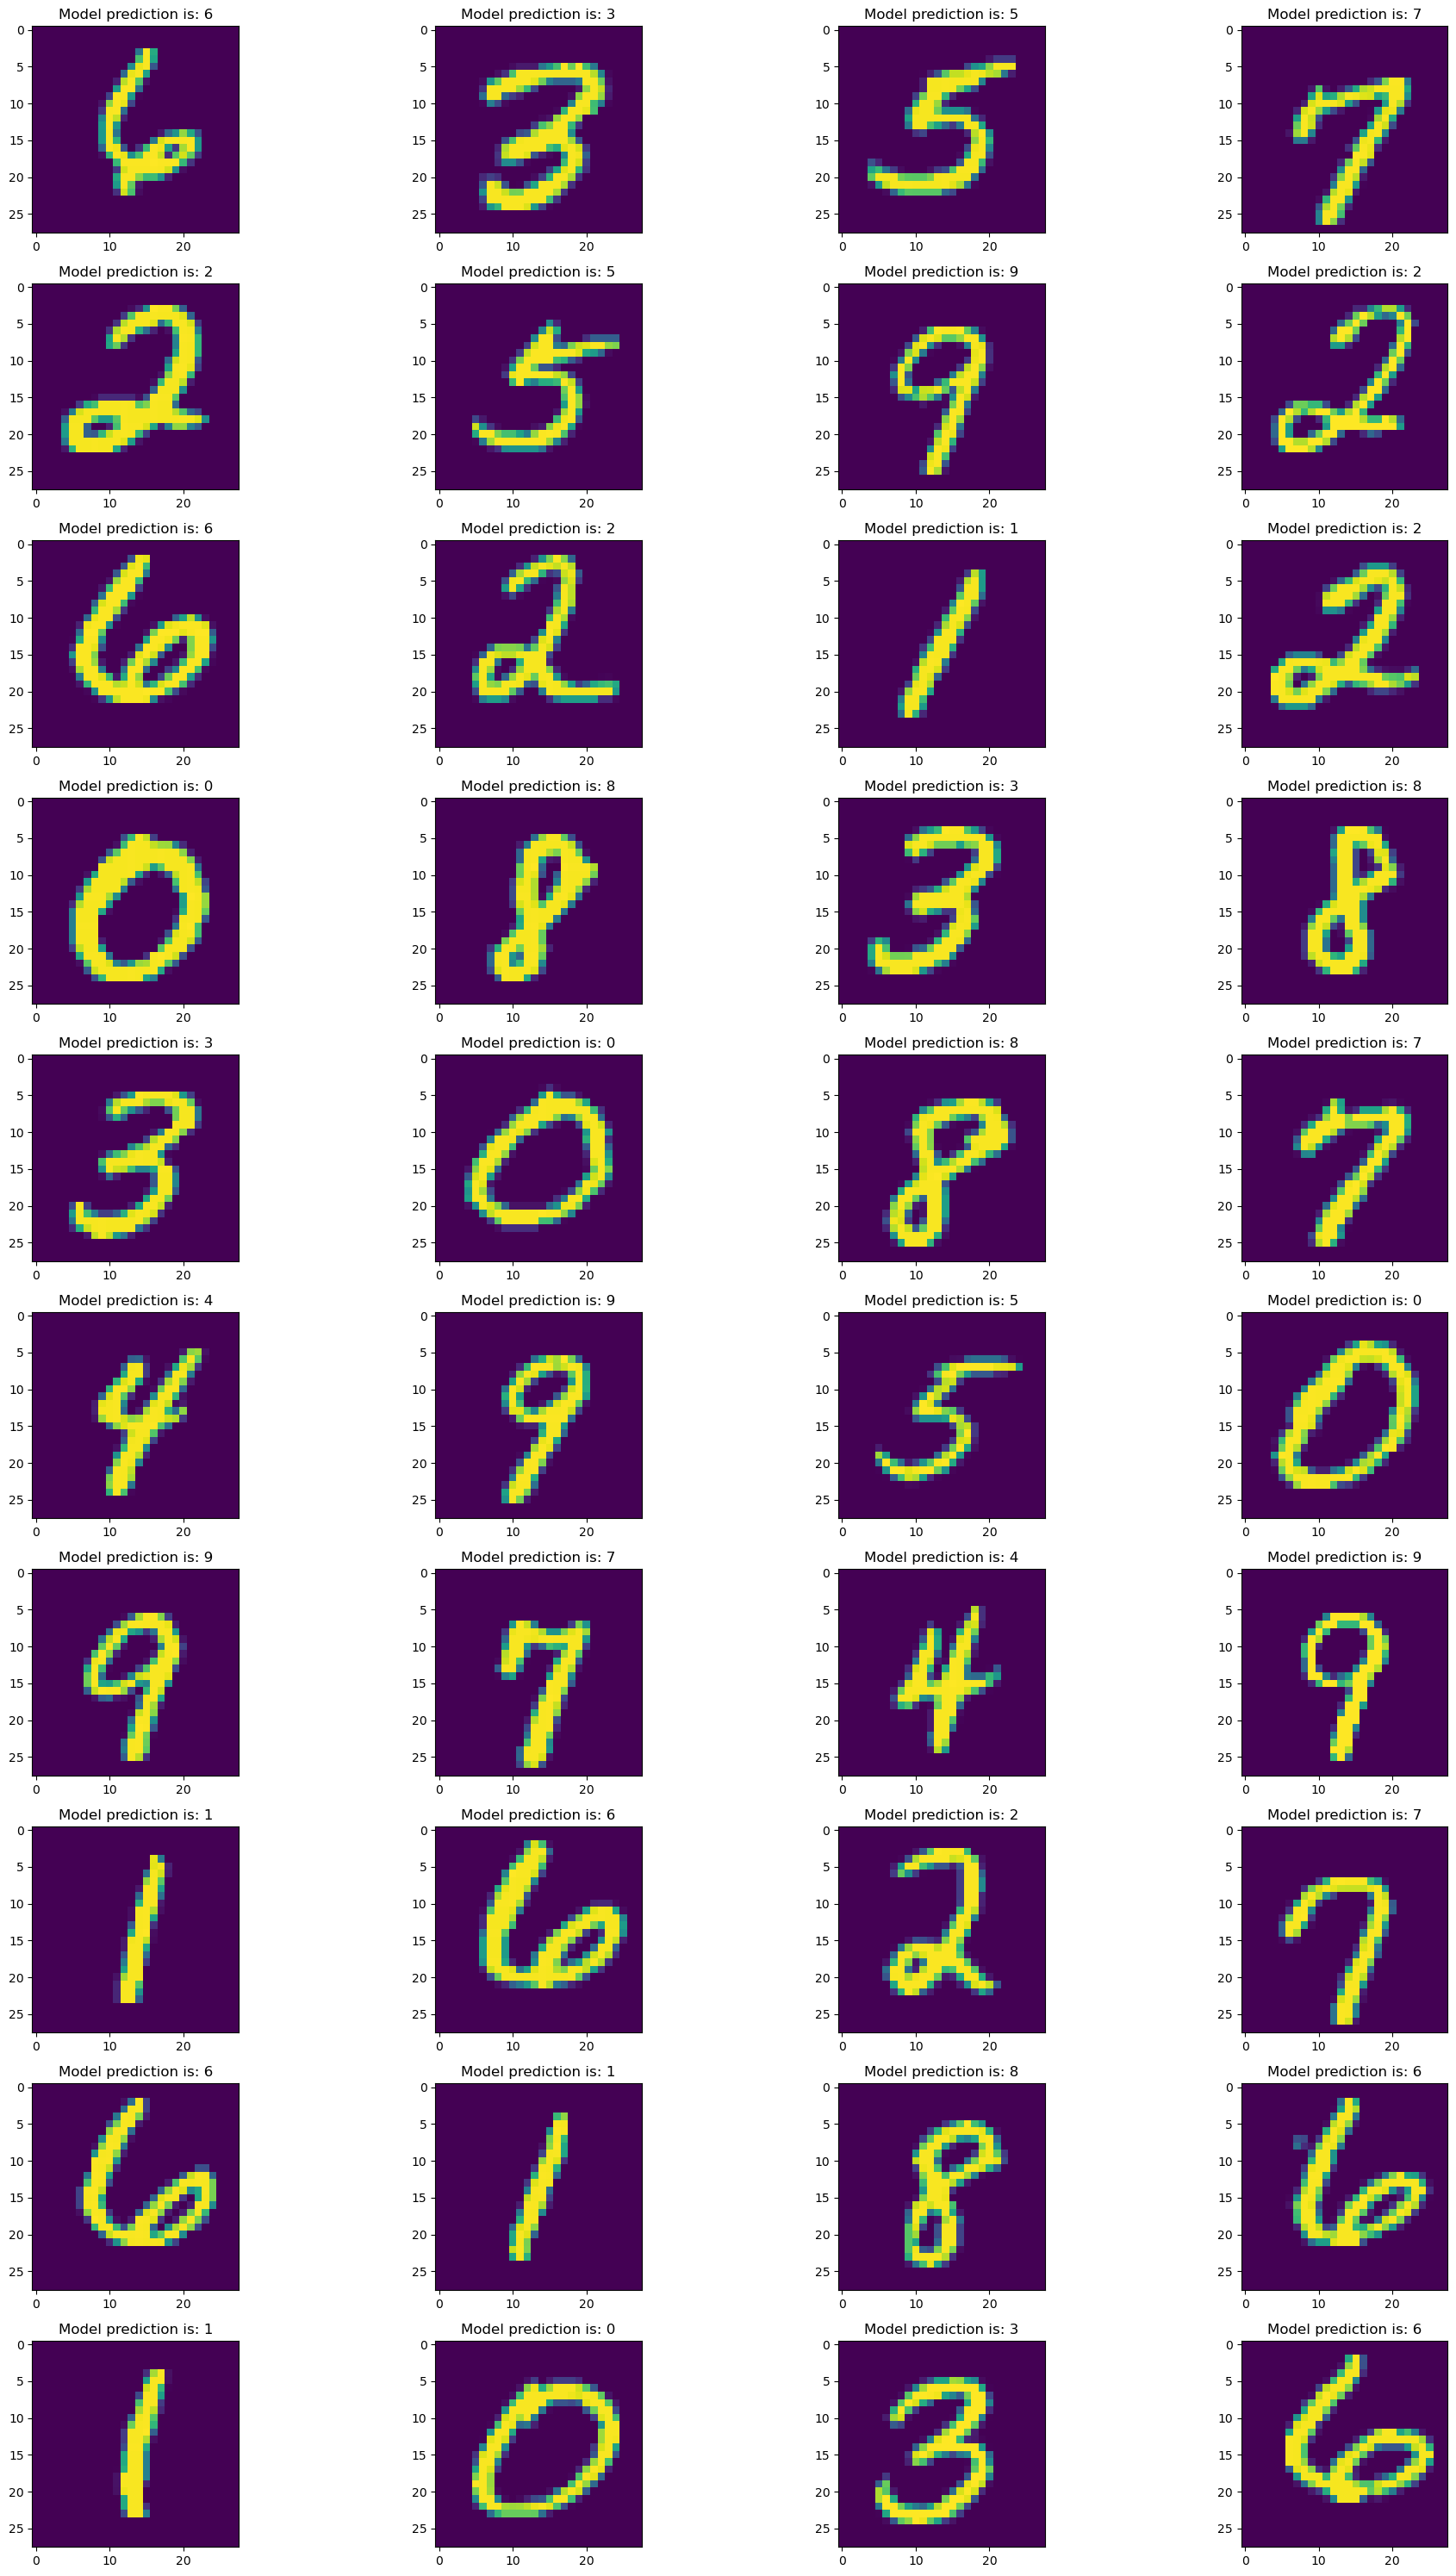

In [53]:
fig, ax = plt.subplots(10,4,figsize=(20,30)) 
for i in range(59001,59041):
    plt.subplot(10,4,i-59000)
    plt.imshow(x_train[i-1])
    plt.title("Model prediction is: {}".format(torch.argmax(y_train[i-1]).numpy()))
fig.tight_layout()
plt.show()